In [8]:
import pandas as pd
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.svm import SVC

os.chdir('/home/adri/Projects/phd/bias_2')

from src.utils.loaders import load_signaling_df

In [2]:
# Load frequency dataframe
contact_freqs = pd.read_csv('data/processed/active_contacts/freq_df2.tsv', index_col=0)

# filter out contacts where residues involved are above 999
for col in contact_freqs.columns:

    if 'LIG' in col:
        continue

    resids = [int(resid) for resid in col.split('-')]

    if resids[0] > 999 or resids[1] > 999:
        contact_freqs = contact_freqs.drop(col, axis=1)

# Convert index to integers (whenever possible) and then to strings
contact_freqs.index = contact_freqs.index.astype(str).str.replace('.0', '')

In [37]:
bs_df = pd.read_csv('data/processed/active_contacts/active_bootstrapp_df.tsv',
                     sep=',', low_memory=False, dtype=str)
bs_df = pd.DataFrame(bs_df.values[1:])
# set column 0 as index
bs_df = bs_df.set_index(0)
bs_df

,1,2,3,4,5,6,7,8,9,10,...,8995,8996,8997,8998,8999,9000,9001,9002,9003,9004
0,,,,,,,,,,,,,,,,,,,,,
112,0.82,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.18,0.0,0.0,0.0,0.0,0.96,0.0,0.0,0.74,0.3
112,0.72,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1,0.0,0.0,0.0,0.0,0.92,0.0,0.02,0.88,0.2
112,0.9,0.0,0.22,0.0,0.0,0.0,0.0,0.0,0.02,0.0,...,0.18,0.0,0.0,0.0,0.0,0.94,0.0,0.0,0.78,0.26
112,0.78,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.18,0.0,0.0,0.02,0.0,0.92,0.0,0.0,0.84,0.24
112,0.78,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.02,0.0,...,0.16,0.0,0.0,0.0,0.0,0.92,0.0,0.0,0.84,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WT,0.86,0.0,0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.16,0.04,0.04,0.98,0.58
WT,0.76,0.0,0.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.14,0.0,0.04,0.98,0.34
WT,0.74,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.18,0.0,0.04,0.96,0.54


In [3]:
# load signaling dataframe
signaling_df = load_signaling_df()
signaling_df.head()

,profile
position,
1,0
2,0
3,0
4,0
5,0


In [39]:
# project into first 10 PCs
pca = PCA(n_components=10)
pca.fit(contact_freqs)
contact_freqs_pca = pca.transform(contact_freqs)

In [40]:
# convert to dataframe using contact_freqs index
contact_freqs_pca_df = pd.DataFrame(contact_freqs_pca, index=contact_freqs.index)
# add column names
contact_freqs_pca_df.columns = ['PC' + str(i) for i in range(1, 11)]

In [41]:
# merge with signaling_df
contact_freqs_pca_df = contact_freqs_pca_df.merge(signaling_df, left_index=True, right_index=True)

In [35]:
# merge signaling_df with bs_df
# bs_df = bs_df.merge(signaling_df, left_index=True, right_index=True)

In [36]:
bs_df

,1,2,3,4,5,6,7,8,9,10,...,8996,8997,8998,8999,9000,9001,9002,9003,9004,profile
0,,,,,,,,,,,,,,,,,,,,,
112,0.82,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.96,0.0,0.0,0.74,0.3,0
112,0.72,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.92,0.0,0.02,0.88,0.2,0
112,0.9,0.0,0.22,0.0,0.0,0.0,0.0,0.0,0.02,0.0,...,0.0,0.0,0.0,0.0,0.94,0.0,0.0,0.78,0.26,0
112,0.78,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.02,0.0,0.92,0.0,0.0,0.84,0.24,0
112,0.78,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.02,0.0,...,0.0,0.0,0.0,0.0,0.92,0.0,0.0,0.84,0.16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.84,0.0,0.12,0.0,0.0,0.0,0.0,0.0,0.0,0.04,...,0.08,0.0,0.0,0.0,0.34,0.1,0.0,0.92,0.48,0
91,0.9,0.0,0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.02,...,0.1,0.0,0.02,0.0,0.42,0.1,0.0,0.92,0.52,0
91,0.92,0.0,0.16,0.0,0.0,0.0,0.0,0.0,0.0,0.04,...,0.06,0.0,0.0,0.0,0.4,0.06,0.06,0.98,0.54,0


In [42]:
contact_freqs_pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,profile
0,,,,,,,,,,,
112,0.657363,3.019339,-1.303861,0.801190,0.515947,0.857341,-1.429824,2.375441,-1.300571,1.225817,0
112,0.884504,3.074655,-1.319201,0.869699,0.374835,0.742985,-1.232114,2.197234,-1.247461,1.183665,0
112,0.625531,3.062774,-1.177709,0.774054,0.313497,0.638015,-1.238326,2.164911,-1.150958,1.099816,0
112,0.793429,3.051356,-1.262148,0.829868,0.323602,0.718453,-1.295747,2.241637,-1.228913,1.204812,0
112,0.691195,3.063562,-1.270862,0.732919,0.319185,0.657603,-1.375743,2.371296,-1.339012,1.086943,0
...,...,...,...,...,...,...,...,...,...,...,...
91,-1.562473,-3.645624,5.298889,-1.656451,1.938222,-2.149271,-2.124533,1.059659,-0.302618,3.063399,0
91,-1.468846,-3.757913,5.365887,-1.745447,1.945220,-1.954006,-2.231691,1.086941,-0.277695,2.987742,0
91,-1.517432,-3.577618,5.322830,-1.550940,1.983860,-2.037136,-2.155776,1.039874,-0.279829,2.953316,0


In [43]:
def plot_decission_surface(f1, f2, y, C=1):
    # fit logistic regression model
    clf = SVC(class_weight='balanced', C=C, kernel='poly', degree=2)
    # clf = RandomForestClassifier(max_depth=4)
    # clf = DecisionTreeClassifier(max_depth=4)
    clf.fit(np.stack([f1, f2]).transpose(), y)
    
    score = clf.score(np.stack([f1, f2]).transpose(), y)

    # define meshgrid of points to evaluate decision boundary
    x_min, x_max = f1.min() - 0.5, f1.max() + 0.5
    y_min, y_max = f2.min() - 0.5, f2.max() + 0.5
    h = 0.01  # step size in meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape).astype(int)

    # plot decision boundary and scatterplot of data points
    colors = sns.color_palette()
    plt.contourf(xx, yy, Z, alpha=0.4, colors=colors, )  # fill decision areas with color
    sns.scatterplot(x=f1, y=f2, hue=y)
    
    
    return score

PC1 vs PC2


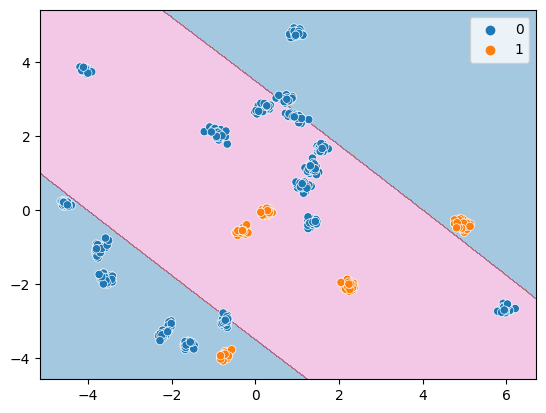

0.47304347826086957
PC1 vs PC3


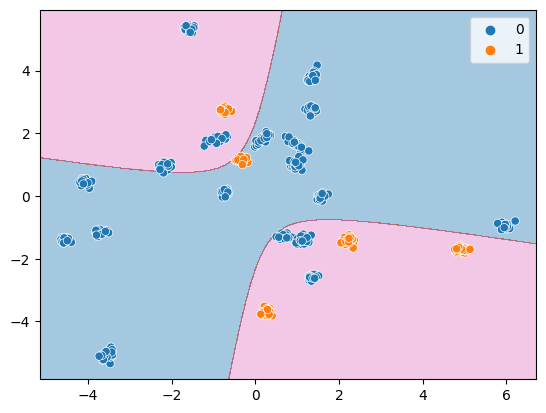

0.697391304347826
PC1 vs PC4


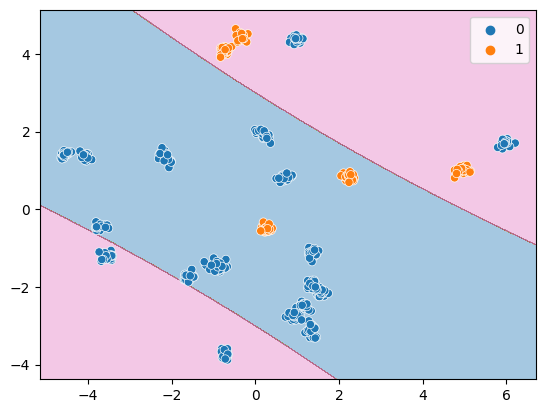

0.7391304347826086
PC1 vs PC5


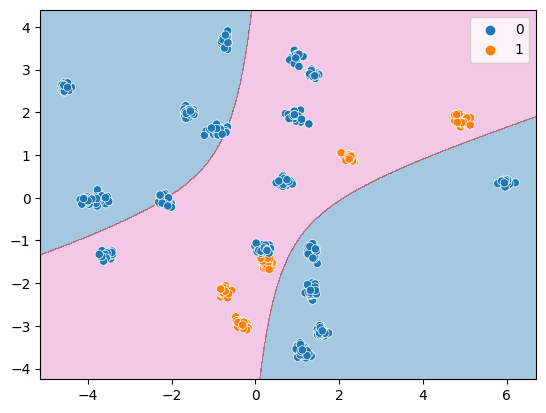

0.7026086956521739
PC1 vs PC6


KeyboardInterrupt: 

In [44]:
# Classify using logistic regression
y = contact_freqs_pca_df['profile'].values
scores = []
for i in range(1,11):
    for j in range(1,11):
        if i == j:
            continue
        
        c1 = f"PC{i}"
        c2 = f"PC{j}"
        
        f1 = contact_freqs_pca_df[c1].values
        f2 = contact_freqs_pca_df[c2].values

        
        print(f"{c1} vs {c2}")
        score = plot_decission_surface(f1, f2, y, C=10)
        # if 'pc1' in [c1, c2]:
        #     plt.xlim((-2, 2))
        plt.show()
        print(score)
        scores.append([c1, c2, score])

In [26]:
pd.DataFrame(scores).sort_values(2)

,0,1,2
13,PC2,PC6,0.434783
46,PC6,PC2,0.434783
55,PC7,PC2,0.478261
14,PC2,PC7,0.478261
85,PC10,PC5,0.478261
...,...,...,...
0,PC1,PC2,0.869565
70,PC8,PC9,0.869565
79,PC9,PC8,0.869565
4,PC1,PC6,0.913043


In [ ]:
# Plot the best combination of PCs


In [12]:
contact_freqs

,281-279,303-301,152-148,85-83,286-282,306-310,271-268,237-236,214-217,306-304,...,174-24,294-302,142-219,97-103,103-93,94-103,209-258,69-138,50-300,138-130
mutant_id,,,,,,,,,,,,,,,,,,,,,
112.0,0.999,0.921,0.996,0.997,0.713,0.999,0.976,0.204,0.969,0.990,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
119.0,0.998,0.963,0.996,0.998,0.904,0.998,0.990,0.441,0.971,0.984,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
121.0,0.999,0.945,0.995,0.997,0.853,0.999,0.995,0.596,0.854,0.993,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
152.0,0.999,0.528,0.000,0.998,0.858,0.999,0.989,0.198,0.948,0.993,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
159.0,1.000,0.983,0.994,0.999,0.693,0.998,0.978,0.142,0.967,0.993,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
185.0,1.000,0.948,0.995,0.999,0.821,0.998,0.982,0.113,0.977,0.993,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
203.0,0.998,0.959,0.997,0.998,0.685,0.997,0.984,0.522,0.920,0.991,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
205.0,0.999,0.978,0.987,1.000,0.946,0.998,0.985,0.334,0.963,0.991,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
217.0,1.000,0.945,0.993,0.998,0.938,0.996,0.973,0.289,0.935,0.989,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
